In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Add, LeakyReLU, UpSampling2D
from keras.models import Model, load_model
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [3]:
os.chdir(r'C:\Users\ebool\study\data\lung')

# Load Dataset

In [6]:
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_val = np.load('x_val.npy')
y_val = np.load('y_val.npy')

print("x_train.shape: {0}\ny_train.shape: {1}".format(x_train.shape, y_train.shape))
print("x_val.shape: {0}\ny_val.shape: {1}".format(x_val.shape, y_val.shape))

x_train.shape: (240, 256, 256, 1)
y_train.shape: (240, 256, 256, 1)
x_val.shape: (27, 256, 256, 1)
y_val.shape: (27, 256, 256, 1)


# Build Model

In [7]:
inputs = Input(shape=(256, 256, 1))

net = Conv2D(32, kernel_size=3, activation='relu', padding='same')(inputs)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Conv2D(64, kernel_size=3, activation='relu', padding='same')(net)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Conv2D(128, kernel_size=3, activation='relu', padding='same')(net)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Dense(128, activation='relu')(net)

net = UpSampling2D(size=2)(net)
net = Conv2D(128, kernel_size=3, activation='sigmoid', padding='same')(net)

net = UpSampling2D(size=2)(net)
net = Conv2D(64, kernel_size=3, activation='sigmoid', padding='same')(net)

net = UpSampling2D(size=2)(net)
outputs = Conv2D(1, kernel_size=3, activation='sigmoid', padding='same')(net)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', 'mse'])

model.summary()


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
______________________________

# Train

In [8]:
history = model.fit(x_train, 
                    y_train, 
                    validation_data=(x_val, y_val), 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[ReduceLROnPlateau(monitor='val_loss', 
                                                 factor=0.2, 
                                                 patience=10, 
                                                 verbose=1, 
                                                 mode='auto', 
                                                 min_lr=1e-05)])


Train on 240 samples, validate on 27 samples
Epoch 1/100
240/240 [==============================] - 144s 599ms/step - loss: 0.5732 - acc: 0.7627 - mse: 0.1836 - val_loss: 0.5160 - val_acc: 0.7467 - val_mse: 0.1725
Epoch 2/100
240/240 [==============================] - 136s 567ms/step - loss: 0.4796 - acc: 0.7627 - mse: 0.1582 - val_loss: 0.4521 - val_acc: 0.7467 - val_mse: 0.1502
Epoch 3/100
240/240 [==============================] - 136s 568ms/step - loss: 0.4364 - acc: 0.7627 - mse: 0.1448 - val_loss: 0.4560 - val_acc: 0.7467 - val_mse: 0.1554
Epoch 4/100
240/240 [==============================] - 135s 561ms/step - loss: 0.4414 - acc: 0.7474 - mse: 0.1491 - val_loss: 0.4186 - val_acc: 0.7467 - val_mse: 0.1401
Epoch 5/100
240/240 [==============================] - 134s 557ms/step - loss: 0.4216 - acc: 0.7632 - mse: 0.1418 - val_loss: 0.4162 - val_acc: 0.7467 - val_mse: 0.1425
Epoch 6/100
240/240 [==============================] - 134s 560ms/step - loss: 0.4009 - acc: 0.7574 - mse: 0.

Epoch 48/100
240/240 [==============================] - 135s 562ms/step - loss: 0.0441 - acc: 0.9826 - mse: 0.0095 - val_loss: 0.1274 - val_acc: 0.9615 - val_mse: 0.0284
Epoch 49/100
240/240 [==============================] - 133s 556ms/step - loss: 0.0488 - acc: 0.9808 - mse: 0.0111 - val_loss: 0.1209 - val_acc: 0.9695 - val_mse: 0.0220
Epoch 50/100
240/240 [==============================] - 133s 556ms/step - loss: 0.0413 - acc: 0.9833 - mse: 0.0089 - val_loss: 0.1196 - val_acc: 0.9703 - val_mse: 0.0215

Epoch 00050: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 51/100
240/240 [==============================] - 132s 552ms/step - loss: 0.0397 - acc: 0.9839 - mse: 0.0085 - val_loss: 0.1199 - val_acc: 0.9705 - val_mse: 0.0213
Epoch 52/100
240/240 [==============================] - 134s 558ms/step - loss: 0.0394 - acc: 0.9841 - mse: 0.0084 - val_loss: 0.1187 - val_acc: 0.9705 - val_mse: 0.0213
Epoch 53/100
240/240 [==============================] - 134s 559ms/s

Epoch 95/100
240/240 [==============================] - 134s 558ms/step - loss: 0.0365 - acc: 0.9850 - mse: 0.0076 - val_loss: 0.1204 - val_acc: 0.9709 - val_mse: 0.0210
Epoch 96/100
240/240 [==============================] - 134s 557ms/step - loss: 0.0365 - acc: 0.9851 - mse: 0.0076 - val_loss: 0.1206 - val_acc: 0.9709 - val_mse: 0.0210
Epoch 97/100
240/240 [==============================] - 135s 561ms/step - loss: 0.0365 - acc: 0.9851 - mse: 0.0076 - val_loss: 0.1205 - val_acc: 0.9709 - val_mse: 0.0210
Epoch 98/100
240/240 [==============================] - 134s 557ms/step - loss: 0.0365 - acc: 0.9851 - mse: 0.0076 - val_loss: 0.1204 - val_acc: 0.9709 - val_mse: 0.0210
Epoch 99/100
240/240 [==============================] - 133s 555ms/step - loss: 0.0365 - acc: 0.9851 - mse: 0.0076 - val_loss: 0.1203 - val_acc: 0.9709 - val_mse: 0.0210
Epoch 100/100
240/240 [==============================] - 133s 556ms/step - loss: 0.0365 - acc: 0.9851 - mse: 0.0076 - val_loss: 0.1205 - val_acc: 0.97

# Evaluation

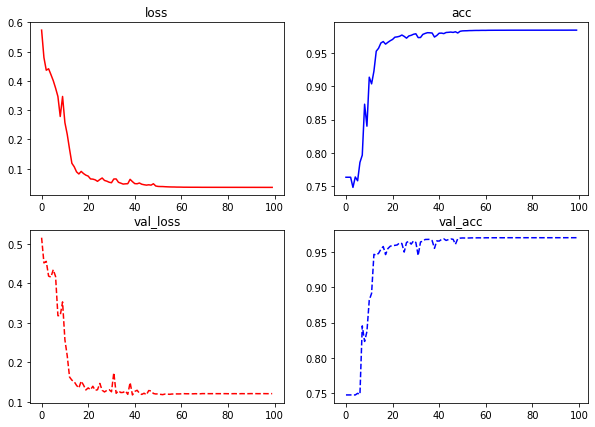

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))

ax[0, 0].set_title('loss')
ax[0, 0].plot(history.history['loss'], 'r')
ax[0, 1].set_title('acc')
ax[0, 1].plot(history.history['acc'], 'b')

ax[1, 0].set_title('val_loss')
ax[1, 0].plot(history.history['val_loss'], 'r--')
ax[1, 1].set_title('val_acc')
ax[1, 1].plot(history.history['val_acc'], 'b--')

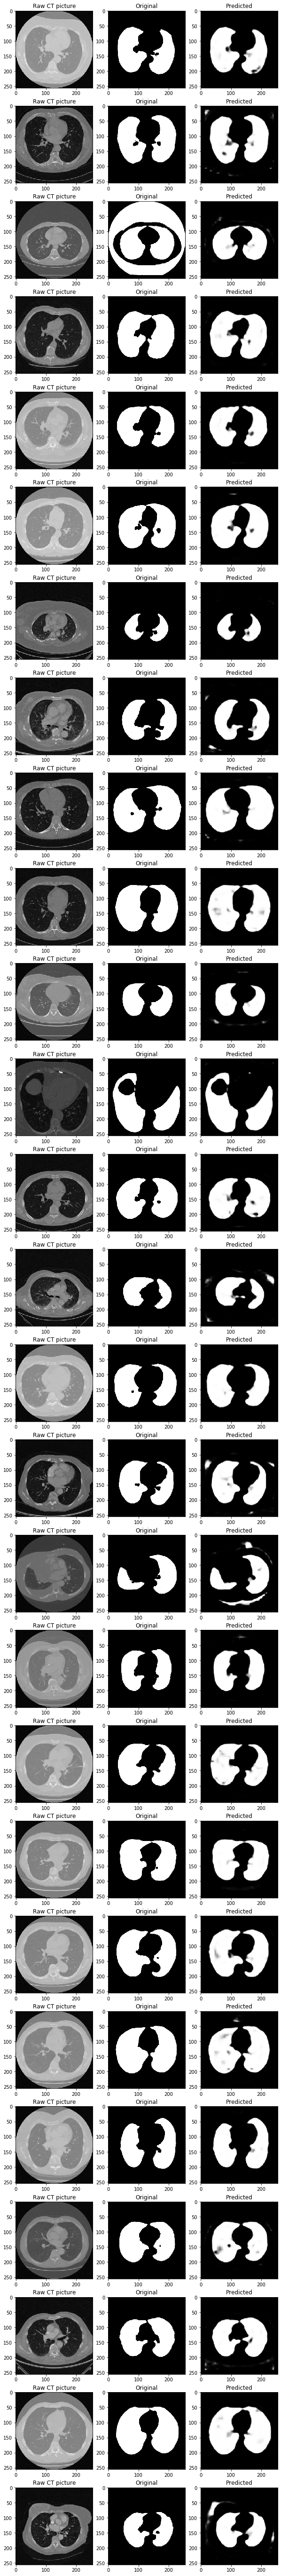

In [12]:
preds = model.predict(x_val)
                        # 27개
fig, ax = plt.subplots(len(x_val), 3, figsize=(10, 100))

for i, pred in enumerate(preds):
    ax[i, 0].set_title('Raw CT picture')
    ax[i, 0].imshow(x_val[i].squeeze(), cmap='gray')
    
    ax[i, 1].set_title('Original')
    ax[i, 1].imshow(y_val[i].squeeze(), cmap='gray')
    
    ax[i, 2].set_title('Predicted')
    ax[i, 2].imshow(pred.squeeze(), cmap='gray')